# Feature Analysis

In [1]:
import sys
sys.path.append('./_backend/')

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Globals
SEED = 0
FONTSIZE = 14
PATIENT_ID = np.load('./../../../data_source/patient_id.npy')

In [3]:
dfs = pd.read_csv('./../../../data_source/to_analysis/target_dfs.csv', index_col=0) 
lrr = pd.read_csv('./../../../data_source/to_analysis/target_lrr.csv', index_col=0)

### Clinical Variables

In [5]:
clinical = pd.read_excel(
    './../../../data_source/raw_tabular/clinical_params.xlsx',
    index_col=0
)
clinical.columns = [
    'Age', 'Sex', 'ICD-10', 'T-Stage', 'N-Stage', 'Overall Stage', 'Histology', 'HPV', 
    'ECOG', 'Charlson', 'Pack-year', 'Naxogin', 'Cisplatin'
]
clinical.head()

,Age,Sex,ICD-10,T-Stage,N-Stage,Overall Stage,Histology,HPV,ECOG,Charlson,Pack-year,Naxogin,Cisplatin
Pasient-ID,,,,,,,,,,,,,
1,57.854795,M,C01,4,2,4a,1.0,2,1,0,32.141096,29.0,0
2,60.832877,M,C09,2,2,4a,0.0,2,0,0,0.000000,39.0,6
3,75.663014,M,C32,2,0,2,1.0,2,0,0,55.663014,41.0,0
4,49.906849,K,C09,2,2,4a,0.0,2,0,0,4.786027,33.0,5
5,54.238356,K,C09,2,0,2,0.0,0,0,0,0.000000,42.0,0


In [6]:
clinical.describe()

,Age,T-Stage,N-Stage,Histology,HPV,ECOG,Charlson,Pack-year,Naxogin,Cisplatin
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
mean,60.557804,2.712598,1.421260,0.372047,1.393701,0.385827,0.610236,25.545214,32.624016,3.385827
std,7.733057,0.990109,0.884485,0.593414,0.673114,0.555920,0.974808,23.264098,12.676944,2.316967
min,38.827397,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.578767,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,5.495034,27.250000,0.000000
50%,60.669863,3.000000,2.000000,0.000000,1.500000,0.000000,0.000000,22.884247,39.000000,5.000000
75%,66.145205,4.000000,2.000000,1.000000,2.000000,1.000000,1.000000,37.388699,41.000000,5.000000
max,79.378082,4.000000,3.000000,3.000000,2.000000,3.000000,6.000000,128.071233,46.000000,7.000000


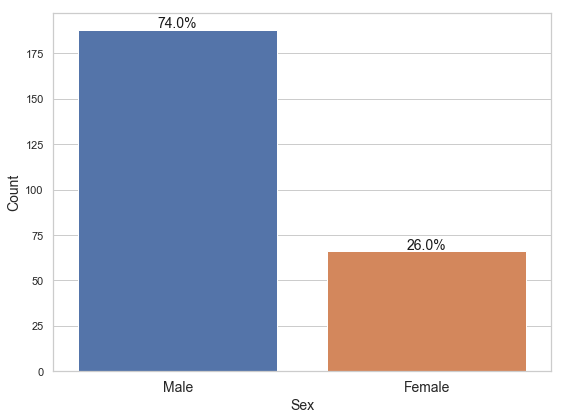

In [7]:
sns.set(style='whitegrid')
fig = plt.figure(figsize=(8, 6))
axis = sns.countplot(x='Sex', data=clinical, saturation=0.85)

plt.ylabel('Count', fontsize=FONTSIZE)
plt.xlabel('Sex', fontsize=FONTSIZE)
plt.xticks(range(2), ['Male', 'Female',], fontsize=FONTSIZE)

sex_ratios = [
    sum(clinical['Sex'] == 'M') / clinical['Sex'].size, 
    sum(clinical['Sex'] == 'K') / clinical['Sex'].size, 
]
for num, patch in enumerate(axis.patches):
    plt.annotate(
        '{:.1f}%'.format(sex_ratios[num] * 100),
        (patch.get_x() + patch.get_width() / 2.5, patch.get_height() + 1), 
        color='k', fontsize=FONTSIZE
    )
      
plt.tight_layout()
plt.savefig(
    './../../../figures/sex_distr.png', 
    bbox_inches='tight',
    transparent=True,
    dpi=400, 
)

### Original Radiomics Features

In [8]:
X = pd.read_csv('./../../../data_source/to_analysis/complete.csv', index_col=0)
X.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxis,original_shape_MajorAxis,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MinorAxis,original_shape_Sphericity,...,Cisplatin_1,Cisplatin_2,Cisplatin_3,Cisplatin_4,Cisplatin_5,Cisplatin_6,Stage 1,Stage 2,Stage 3,Stage 4
patient,,,,,,,,,,,,,,,,,,,,,
2,0.738882,0.723925,27.060529,37.380273,41.976184,44.598206,42.720019,45.617979,27.619612,0.661532,...,0,0,0,0,0,1,0,0,0,1
4,0.796900,0.629917,19.845151,31.504408,38.587563,35.468296,29.410882,38.704005,25.105855,0.701721,...,0,0,0,0,1,0,0,0,0,1
5,0.600926,0.535140,22.515072,42.073251,46.065171,43.011626,32.015621,46.454279,25.282894,0.762365,...,0,0,0,0,0,0,0,1,0,0
8,0.784571,0.414247,30.263897,73.057649,74.148500,80.956779,65.764732,83.438600,57.318945,0.520001,...,0,0,1,0,0,0,0,0,0,1
10,0.690320,0.539743,19.449801,36.035312,33.286634,38.013156,33.015148,43.150898,24.875896,0.643822,...,0,0,0,0,0,1,0,0,0,1


In [9]:
X.filter(regex='shape').columns

Index(['original_shape_Elongation', 'original_shape_Flatness',
       'original_shape_LeastAxis', 'original_shape_MajorAxis',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum2DDiameterRow',
       'original_shape_Maximum2DDiameterSlice',
       'original_shape_Maximum3DDiameter', 'original_shape_MinorAxis',
       'original_shape_Sphericity', 'original_shape_SurfaceArea',
       'original_shape_SurfaceVolumeRatio', 'original_shape_Volume'],
      dtype='object')

In [10]:
sphericity = X.loc[:, 'original_shape_Sphericity'].values
surface_area = X.loc[:, 'original_shape_SurfaceArea'].values
volume = X.loc[:, 'original_shape_Volume'].values
min(volume), max(volume), min(surface_area), max(surface_area)

(798.0, 284957.0, 533.4870763432214, 31120.18898060232)

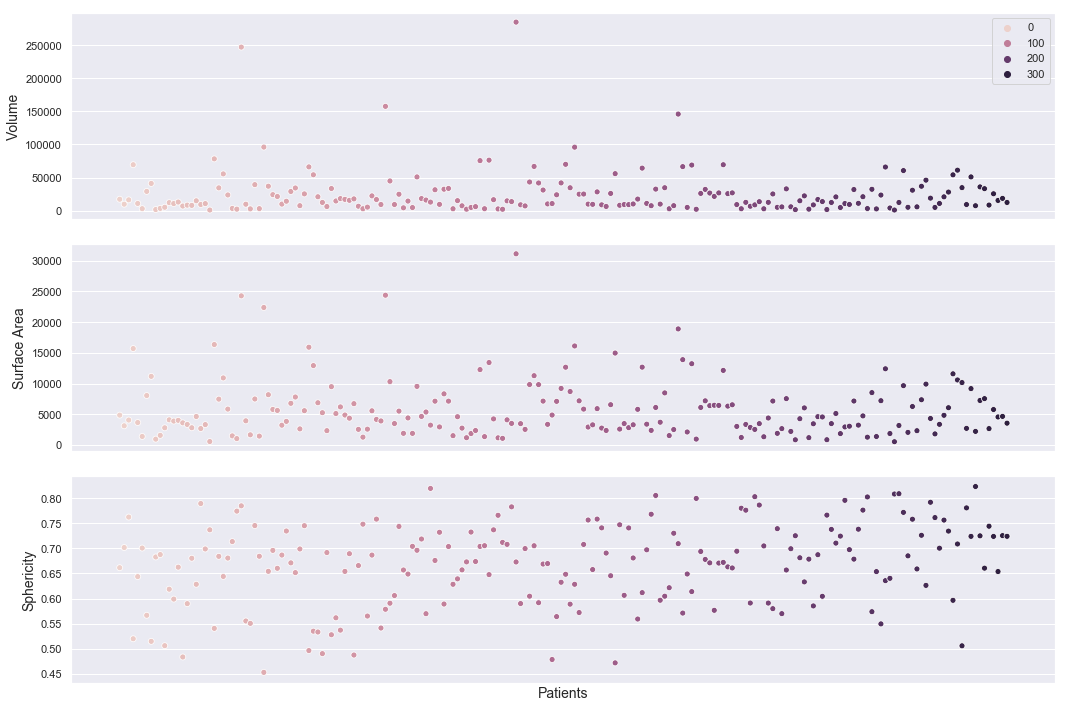

In [11]:
# NOTE: Shape features are calculated from the mask image (same for both CT and PET).
sns.set()
fig, axes = plt.subplots(nrows=3, figsize=(15, 10), sharex=True)

vals = X.loc[:, 'original_shape_Volume'].values
sns.scatterplot(
    x=range(198), y=vals, 
    hue=PATIENT_ID, ax=axes[0], 
)
axes[0].set_ylabel('Volume', fontsize=FONTSIZE)

vals = X.loc[:, 'original_shape_SurfaceArea'].values
sns.scatterplot(
    x=range(198), y=vals, 
    hue=PATIENT_ID, ax=axes[1], legend=False
)

vals = X.loc[:, 'original_shape_Sphericity'].values
axes[1].set_ylabel('Surface Area', fontsize=FONTSIZE)
sns.scatterplot(
    x=range(198), y=vals, 
    hue=PATIENT_ID, ax=axes[2], legend=False
)
axes[2].set_ylabel('Sphericity', fontsize=FONTSIZE)
axes[2].set_xlabel('Patients', fontsize=FONTSIZE)
axes[2].set_xticks([])

plt.tight_layout()
plt.savefig(
    './../../../figures/tumor_char.png', 
    bbox_inches='tight',
    transparent=True,
    dpi=400, 
)

In [12]:
PATIENT_ID.size

198

In [22]:
X.filter(regex='firstorder').columns.values

array(['CT original_firstorder_10Percentile',
       'CT original_firstorder_90Percentile',
       'CT original_firstorder_Energy', 'CT original_firstorder_Entropy',
       'CT original_firstorder_InterquartileRange',
       'CT original_firstorder_Kurtosis',
       'CT original_firstorder_Maximum',
       'CT original_firstorder_MeanAbsoluteDeviation',
       'CT original_firstorder_Mean', 'CT original_firstorder_Median',
       'CT original_firstorder_Minimum', 'CT original_firstorder_Range',
       'CT original_firstorder_RobustMeanAbsoluteDeviation',
       'CT original_firstorder_RootMeanSquared',
       'CT original_firstorder_Skewness',
       'CT original_firstorder_TotalEnergy',
       'CT original_firstorder_Uniformity',
       'CT original_firstorder_Variance',
       'PET original_firstorder_10Percentile',
       'PET original_firstorder_90Percentile',
       'PET original_firstorder_Energy',
       'PET original_firstorder_Entropy',
       'PET original_firstorder_Interqua

In [ ]:
# NOTE: Shape features are calculated from the mask image (same for both CT and PET).


In [37]:
X.loc[:, 'original_shape_SurfaceArea'].shape

(198,)

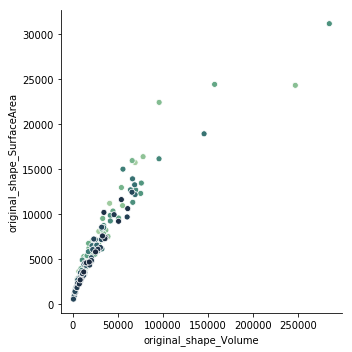

In [20]:
sns.relplot(
    x='original_shape_Volume', y='original_shape_SurfaceArea', 
    hue=PATIENT_ID, palette="ch:r=-.5,l=.75", data=X, legend=False
);

In [91]:
ct_features =  X.filter(regex='CT')
pet_features =  X.filter(regex='PET')
shape_features =  X.filter(regex='CT')

/Users/severinlangberg/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


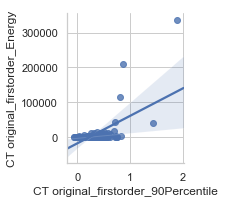

In [106]:
g = sns.FacetGrid(ct_features, margin_titles=True);
g.map(sns.regplot, ct_features.columns[1], ct_features.columns[2]);

## Decorrelated Features

In [107]:
decorr = pd.read_csv('./../../data/to_analysis/complete_decorr.csv', index_col=0)
decorr.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxis,original_shape_MajorAxis,original_shape_Sphericity,CT original_firstorder_10Percentile,CT original_firstorder_90Percentile,CT original_firstorder_Energy,CT original_firstorder_Entropy,CT original_firstorder_InterquartileRange,...,Cisplatin_3,Cisplatin_4,Cisplatin_5,Cisplatin_6,Stage 1,Stage 2,Stage 3,Stage 4,forward_corr,backward_corr
patient,,,,,,,,,,,,,,,,,,,,,
2,0.738882,0.723925,27.060529,37.380273,0.661532,0.097696,0.221526,568.990940,0.183969,0.056668,...,0,0,0,1,0,0,0,1,1.306738,0.765264
4,0.796900,0.629917,19.845151,31.504408,0.701721,-0.315120,0.171638,526.512287,0.990405,0.182336,...,0,0,1,0,0,0,0,1,1.164781,0.858530
5,0.600926,0.535140,22.515072,42.073251,0.762365,-0.084255,0.278018,815.922259,0.627742,0.110940,...,0,0,0,0,0,1,0,0,0.666036,1.501420
8,0.784571,0.414247,30.263897,73.057649,0.520001,0.022160,0.187135,3844.580668,0.415386,0.064696,...,1,0,0,0,0,0,0,1,1.365648,0.732253
10,0.690320,0.539743,19.449801,36.035312,0.643822,-0.180616,-0.068998,428.168548,0.063316,0.044584,...,0,0,0,1,0,0,0,1,4.761471,0.210019


In [108]:
X = decorr.copy()

/Users/severinlangberg/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


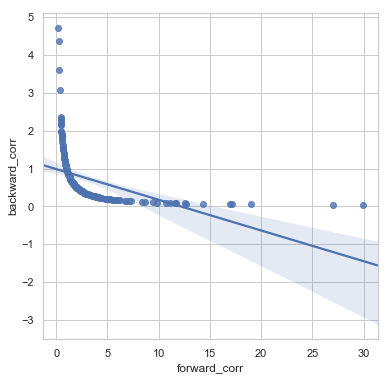

In [111]:
plt.figure(figsize=(6, 6))
sns.regplot(x='forward_corr', y='backward_corr', data=X);

/Users/severinlangberg/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


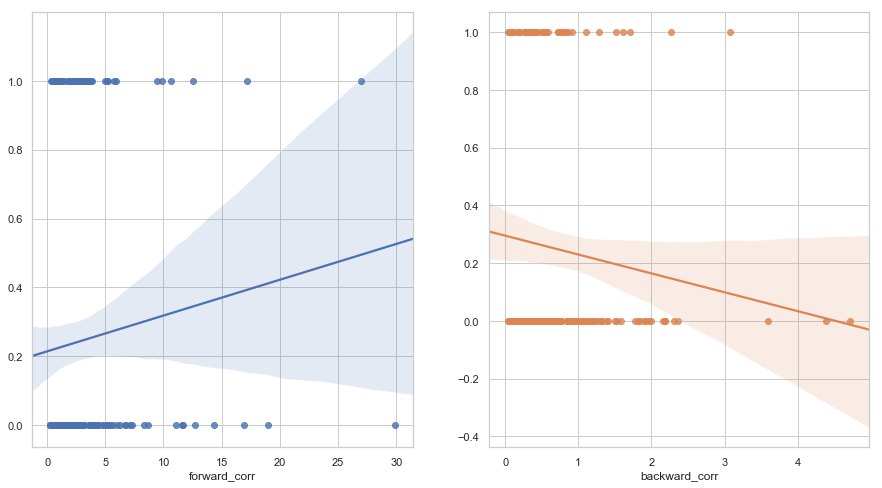

In [120]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 8))
sns.regplot(x=X['forward_corr'], y=np.squeeze(dfs.values), ax=axes[0]);
sns.regplot(x=X['backward_corr'], y=np.squeeze(dfs.values), ax=axes[1]);

# Subspace Analysis

In [240]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [241]:
complete_decorr = pd.read_csv('./../../data/to_analysis/complete_decorr.csv', index_col=0)
clinical = pd.read_csv('./../../data/to_analysis/clinical_params.csv', index_col=0)
radiom = pd.read_csv('./../../data/to_analysis/img_features.csv', index_col=0)

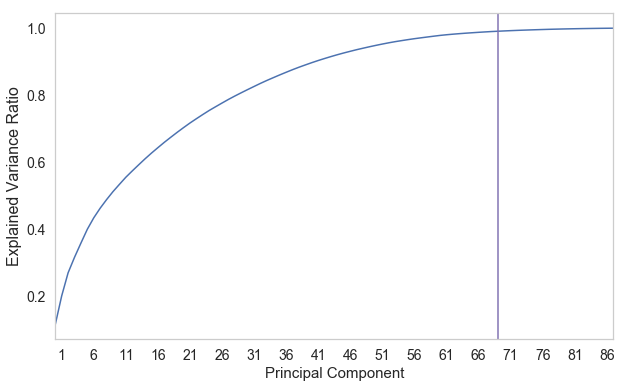

In [242]:
# 
X = complete_decorr

# Standardize prior to PCA.
scaler = StandardScaler()
X_std = scaler.fit_transform(X.values)

pca_model = PCA(n_components=X.shape[1])
pca_model.fit(X_std)

# Number of components for >= 0.99 variance.
target_n_comps = X.shape[1] - sum(np.cumsum(pca_model.explained_variance_ratio_) >= 0.99)

tick_range = np.arange(1, X.shape[1] + 1, 5)
# Information (variance) attributed to each PC
plt.figure(figsize=(10, 6))
plt.plot(
    np.cumsum(pca_model.explained_variance_ratio_)
);
plt.xlabel('Principal Component', fontsize=15);
plt.ylabel('Explained Variance Ratio', fontsize=16);
plt.xticks(tick_range, tick_range)
plt.yticks(fontsize=14); plt.xticks(fontsize=14);
plt.axvline(x=target_n_comps, c='m')
plt.xlim([0, 87])
plt.grid()

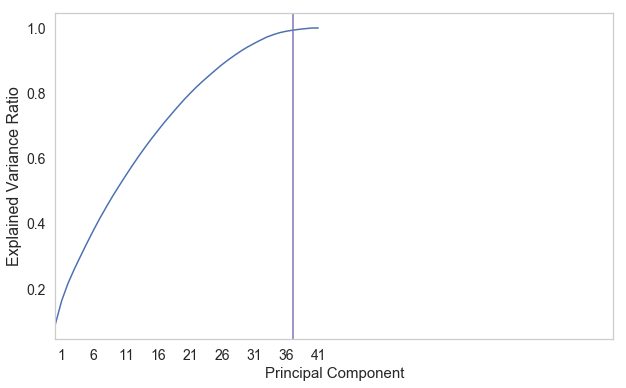

In [243]:
X = clinical

# Standardize prior to PCA.
scaler = StandardScaler()
X_std = scaler.fit_transform(X.values)

pca_model = PCA(n_components=X.shape[1])
pca_model.fit(X_std)

# Number of components for >= 0.99 variance.
target_n_comps = X.shape[1] - sum(np.cumsum(pca_model.explained_variance_ratio_) >= 0.99)

tick_range = np.arange(1, X.shape[1] + 1, 5)
# Information (variance) attributed to each PC
plt.figure(figsize=(10, 6))
plt.plot(
    np.cumsum(pca_model.explained_variance_ratio_)
);
plt.xlabel('Principal Component', fontsize=15);
plt.ylabel('Explained Variance Ratio', fontsize=16);
plt.xticks(tick_range, tick_range)
plt.yticks(fontsize=14); plt.xticks(fontsize=14);
plt.axvline(x=target_n_comps, c='m')
plt.xlim([0, 87])
plt.grid()

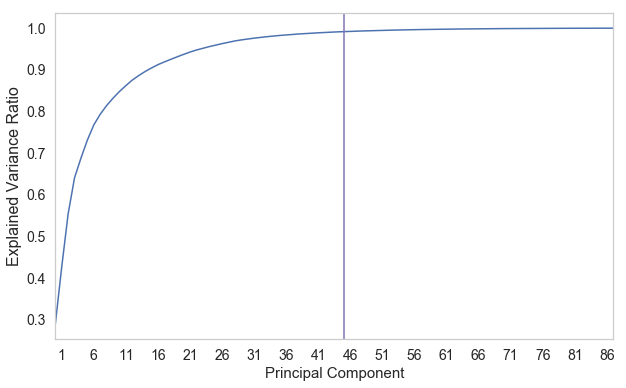

In [246]:
X = radiom

# Standardize prior to PCA.
scaler = StandardScaler()
X_std = scaler.fit_transform(X.values)

pca_model = PCA(n_components=X.shape[1])
pca_model.fit(X_std)

# Number of components for >= 0.99 variance.
target_n_comps = X_std.shape[1] - sum(np.cumsum(pca_model.explained_variance_ratio_) >= 0.99)

tick_range = np.arange(1, X_std.shape[1] + 1, 5)
# Information (variance) attributed to each PC
plt.figure(figsize=(10, 6))
plt.plot(
    np.cumsum(pca_model.explained_variance_ratio_)
);
plt.xlabel('Principal Component', fontsize=15);
plt.ylabel('Explained Variance Ratio', fontsize=16);
plt.xticks(tick_range, tick_range)
plt.yticks(fontsize=14); plt.xticks(fontsize=14);
plt.axvline(x=target_n_comps, c='m')
plt.xlim([0, 87])
plt.grid()

# Clustering Analysis

In [123]:
complete_decorr = pd.read_csv('./../../data/to_analysis/complete_decorr.csv', index_col=0)
clinical = pd.read_csv('./../../data/to_analysis/clinical_params.csv', index_col=0)
radiom = pd.read_csv('./../../data/to_analysis/img_features.csv', index_col=0)

## Consensus clustering

In [ ]:
from sklearn.cluster import bicluster

### Spectral Coclustering

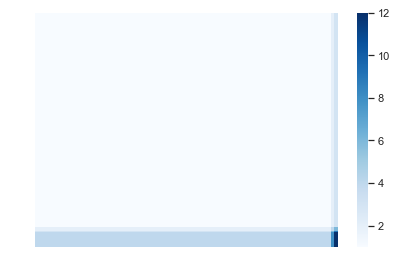

In [185]:
# Complete decorrelated data.
bic_model = bicluster.SpectralCoclustering(n_clusters=4)
bic_model.fit(complete_decorr)

data = complete_decorr.values
fit_data = data[np.argsort(bic_model.row_labels_)]
fit_data = fit_data[:, np.argsort(bic_model.column_labels_)]

plt.figure()
sns.heatmap(
    np.outer(
        np.sort(bic_model.row_labels_) + 1, np.sort(bic_model.column_labels_) + 1
    ),
    cmap=plt.cm.Blues
)
plt.axis('off')
plt.tight_layout()

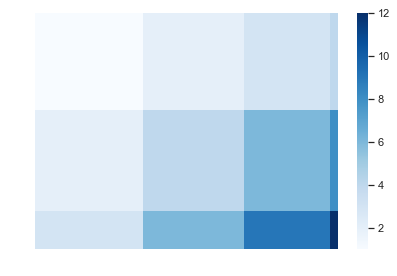

In [186]:
# Clinical data.
bic_model = bicluster.SpectralCoclustering(n_clusters=4)
bic_model.fit(clinical)

data = clinical.values
fit_data = data[np.argsort(bic_model.row_labels_)]
fit_data = fit_data[:, np.argsort(bic_model.column_labels_)]

plt.figure()
sns.heatmap(
    np.outer(
        np.sort(bic_model.row_labels_) + 1, np.sort(bic_model.column_labels_) + 1
    ),
    cmap=plt.cm.Blues
)
plt.axis('off')
plt.tight_layout()

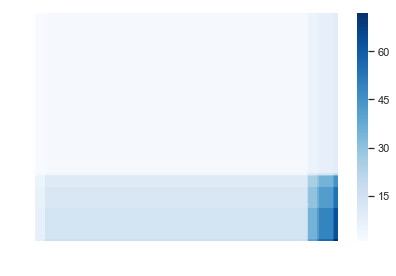

In [181]:
# Radiomics data.
bic_model = bicluster.SpectralCoclustering(n_clusters=9)
bic_model.fit(radiom)

data = radiom.values
fit_data = data[np.argsort(bic_model.row_labels_)]
fit_data = fit_data[:, np.argsort(bic_model.column_labels_)]

plt.figure()
sns.heatmap(
    np.outer(
        np.sort(bic_model.row_labels_) + 1, np.sort(bic_model.column_labels_) + 1
    ),
    cmap=plt.cm.Blues
)
plt.axis('off')
plt.tight_layout()

### Spectral Biclustering

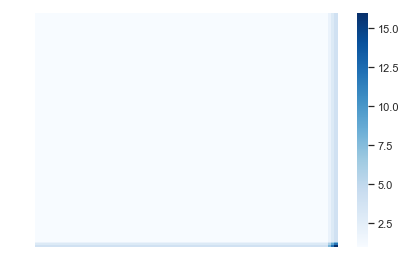

In [187]:
# Complete decorrelated data.
bic_model = bicluster.SpectralBiclustering(n_clusters=4)
bic_model.fit(complete_decorr)

data = complete_decorr.values
fit_data = data[np.argsort(bic_model.row_labels_)]
fit_data = fit_data[:, np.argsort(bic_model.column_labels_)]

plt.figure()
sns.heatmap(
    np.outer(
        np.sort(bic_model.row_labels_) + 1, np.sort(bic_model.column_labels_) + 1
    ),
    cmap=plt.cm.Blues
)
plt.axis('off')
plt.tight_layout()

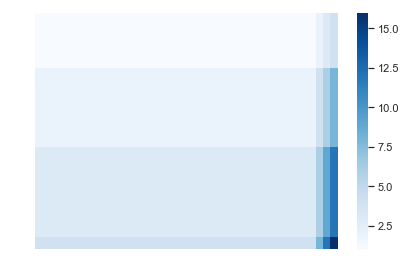

In [189]:
# Clinical data.
bic_model = bicluster.SpectralBiclustering(n_clusters=4)
bic_model.fit(clinical)

data = clinical.values
fit_data = data[np.argsort(bic_model.row_labels_)]
fit_data = fit_data[:, np.argsort(bic_model.column_labels_)]

plt.figure()
sns.heatmap(
    np.outer(
        np.sort(bic_model.row_labels_) + 1, np.sort(bic_model.column_labels_) + 1
    ),
    cmap=plt.cm.Blues
)
plt.axis('off')
plt.tight_layout()

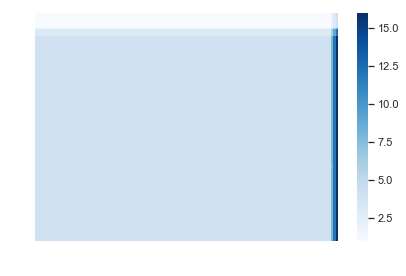

In [190]:
# Radiomics data.
bic_model = bicluster.SpectralBiclustering(n_clusters=4)
bic_model.fit(radiom)

data = radiom.values
fit_data = data[np.argsort(bic_model.row_labels_)]
fit_data = fit_data[:, np.argsort(bic_model.column_labels_)]

plt.figure()
sns.heatmap(
    np.outer(
        np.sort(bic_model.row_labels_) + 1, np.sort(bic_model.column_labels_) + 1
    ),
    cmap=plt.cm.Blues
)
plt.axis('off')
plt.tight_layout()

## Density Based Scan

In [154]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [156]:
complete_decorr_std = StandardScaler().fit_transform(complete_decorr)
clinical_std = StandardScaler().fit_transform(clinical)
radiom_std = StandardScaler().fit_transform(radiom)

Text(0.5, 1.0, 'Estimated number of clusters: 0')

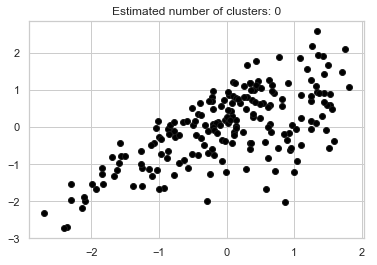

In [161]:
# Complete decorrelated data.
X = complete_decorr_std

dbscan = DBSCAN(eps=0.01, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
for k, col in zip(unique_labels, colors):
    # Black used for noise.
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)

    xy = complete_decorr_std[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)

Text(0.5, 1.0, 'Estimated number of clusters: 0')

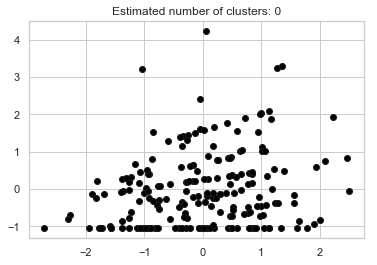

In [163]:
# Clinical data.
X = clinical_std

dbscan = DBSCAN(eps=0.1, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
for k, col in zip(unique_labels, colors):
    # Black used for noise.
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)

    xy = complete_decorr_std[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)

Text(0.5, 1.0, 'Estimated number of clusters: 0')

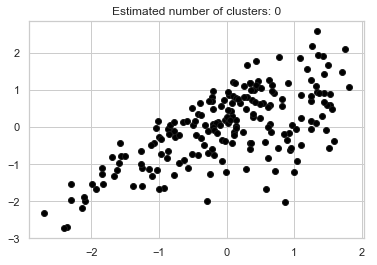

In [164]:
# Radiomics data.
X = radiom_std

dbscan = DBSCAN(eps=0.1, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
for k, col in zip(unique_labels, colors):
    # Black used for noise.
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)

    xy = complete_decorr_std[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)

## K-Means 

In [167]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [198]:
# Complete decorrelated data.
X = complete_decorr_std

n_clusters = 2

clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(X)

silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.0745185459122549
